In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [3]:
import os
os.chdir('../../')

In [4]:
from programs import lstm_tool

In [5]:
df_name = 'nov_nine_var.xlsx'

In [6]:
df = pd.read_excel('./documents/' + df_name).iloc[:,1::].diff()[1:431]
X = df.iloc[:,0:21].to_numpy()
y = df.iloc[:,-1].to_numpy()

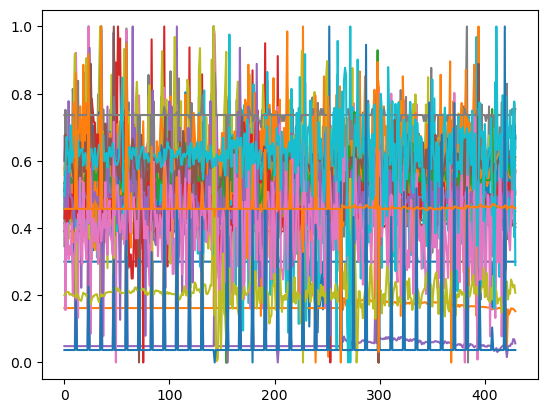

In [19]:
plt.plot(scaler.fit_transform(df))
plt.show()

In [8]:
goal_df = pd.read_excel('./documents/result/basic_formula.xlsx').iloc[:,-1].to_numpy()
goal = goal_df[[min(range(len(goal_df)), key=lambda i: goal_df[i])]]

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
ACTION_NUM = 5
LENGTH = 60

In [12]:
class Model_(tf.keras.Model):
    def __init__(self):
        super(Model_, self).__init__()
        self.d0 = tf.keras.layers.LSTM(64, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotUniform() , return_sequences=True, dropout=0.2)
        self.d1 = tf.keras.layers.LSTM(32, activation='tanh', return_sequences=False)
        self.d2 = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal())
        self.d3 = tf.keras.layers.Dense(units=21, activation='linear')

        self.batch_norm = tf.keras.layers.BatchNormalization()

    def call(self, inputs):
        x = self.d0(inputs)
        x = self.d1(x)
        x = self.batch_norm(x, training=False)
        x = self.d2(x)
        x = self.d3(x)

        return x

In [14]:
short_lstm = Model_()
short_lstm.build(input_shape=(1, LENGTH, 21))
short_lstm.compile(optimizer='adam', loss='mse')

d1, d2, d3, d4 = lstm_tool.make_dataset(X, LENGTH, n=len(X))

short_lstm.fit(d1, d3, epochs=100, batch_size=128, validation_data=(d2, d4), verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 483ms/step - loss: 0.1982 - val_loss: 0.1249
Epoch 2/100
4/4 [==============================] - 2s 395ms/step - loss: 0.1083 - val_loss: 0.0754
Epoch 3/100
4/4 [==============================] - 1s 379ms/step - loss: 0.0687 - val_loss: 0.0585
Epoch 4/100
4/4 [==============================] - 1s 383ms/step - loss: 0.0575 - val_loss: 0.0477
Epoch 5/100
4/4 [==============================] - 1s 372ms/step - loss: 0.0462 - val_loss: 0.0395
Epoch 6/100
4/4 [==============================] - 1s 373ms/step - loss: 0.0390 - val_loss: 0.0328
Epoch 7/100
4/4 [==============================] - 1s 367ms/step - loss: 0.0326 - val_loss: 0.0269
Epoch 8/100
4/4 [==============================] - 1s 385ms/step - loss: 0.0270 - val_loss: 0.0224
Epoch 9/100
4/4 [==============================] - 1s 373ms/step - loss: 0.0228 - val_loss: 0.0184
Epoch 10/100
4/4 [==============================] - 1s 363ms/step - loss: 0.0192 - val_loss: 0.0155
Epoch 11/

In [15]:
short_lstm.save('./model/short_lstm')

INFO:tensorflow:Assets written to: ./model/short_lstm\assets


INFO:tensorflow:Assets written to: ./model/short_lstm\assets


In [11]:
power_lstm = Model_()
power_lstm.build(input_shape=(1, LENGTH, 21))
power_lstm.compile(optimizer='adam', loss='mse')

d = lstm_tool.make_dataset(X, LENGTH, n=len(X))
power_lstm.fit(d[0], d[2], epochs=1000, batch_size=128, validation_data=(d[1], d[3]), verbose=0)

In [12]:
power_lstm.save('./model/power_lstm')

INFO:tensorflow:Assets written to: ./model/power_lstm\assets


INFO:tensorflow:Assets written to: ./model/power_lstm\assets


In [14]:
model_list = [Model_() for i in range(ACTION_NUM)]

In [16]:
for i in range(5):
    model_list[i].build(input_shape=(1, LENGTH, 21))
    model_list[i].compile(optimizer='adam', loss='mse')
    d = lstm_tool.make_dataset(X, LENGTH)
    model_list[i].fit(d[0], d[2], epochs=1000, batch_size=128, validation_data=(d[1], d[3]), verbose=0)

2023-04-15 11:54:17.641003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-15 11:54:17.641828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-15 11:54:17.642436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

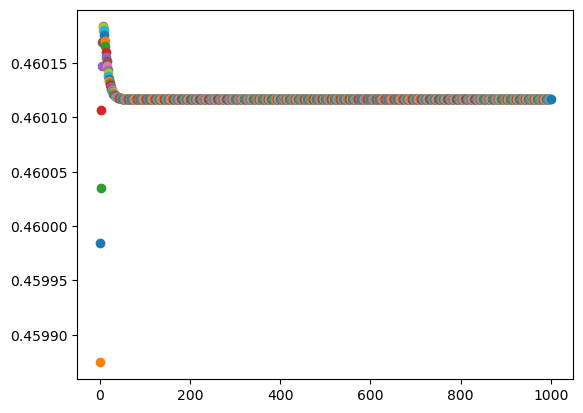

array([[[0.30308858, 0.18814717, 0.47263259, ..., 0.19267993,
         0.62832206, 0.0773244 ]],

       [[0.29556713, 0.18884447, 0.4697834 , ..., 0.20110811,
         0.62225759, 0.0793293 ]],

       [[0.29526234, 0.18961188, 0.47135845, ..., 0.20405607,
         0.62456334, 0.08155652]],

       ...,

       [[0.2948842 , 0.19002113, 0.47016773, ..., 0.20474012,
         0.62419206, 0.08447242]],

       [[0.29488423, 0.19002111, 0.47016779, ..., 0.20474018,
         0.624192  , 0.08447245]],

       [[0.29488426, 0.19002108, 0.47016788, ..., 0.20474018,
         0.62419194, 0.0844725 ]]])

In [16]:
lstm_tool.plot_tree([short_lstm], X[0:60].reshape(1, 60, 21), 1, 1000, plot=True)

In [ ]:
for i in range(5):
    model_list[i].save('./model/action_net/action_net{0}'.format(i))
    print(i)

In [ ]:
ASDF

In [83]:
faker = tf.keras.Sequential()
faker.add(tf.keras.layers.LSTM(128, input_shape=(12, 1), activation='tanh', return_sequences=False))
faker.add(tf.keras.layers.Dense(64, activation='relu'))
faker.add(tf.keras.layers.Dense(1, activation='linear'))
faker.compile(optimizer='adam', loss='mse')

In [103]:
X_data = []
y_data = []
for idx in range(len(y)-12-1):
    X_data.append(y[idx:idx+12])
    y_data.append(y[idx+12+1])
dd = train_test_split(np.array(X_data), np.array(y_data))
faker.fit(dd[0], dd[2], epochs=1000, batch_size=128, validation_data=(dd[1], dd[3]), callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/1000
3/3 [==============================] - 0s 108ms/step - loss: 1.2716e-05 - val_loss: 2.0962e-05
Epoch 2/1000
3/3 [==============================] - 0s 140ms/step - loss: 1.3185e-05 - val_loss: 1.5099e-05
Epoch 3/1000
3/3 [==============================] - 0s 120ms/step - loss: 1.0499e-05 - val_loss: 1.3827e-05
Epoch 4/1000
3/3 [==============================] - 0s 123ms/step - loss: 9.4037e-06 - val_loss: 1.0338e-05
Epoch 5/1000
3/3 [==============================] - 0s 128ms/step - loss: 8.3433e-06 - val_loss: 9.0898e-06
Epoch 6/1000
3/3 [==============================] - 0s 117ms/step - loss: 7.6326e-06 - val_loss: 7.3468e-06
Epoch 7/1000
3/3 [==============================] - 0s 108ms/step - loss: 7.0956e-06 - val_loss: 7.2267e-06
Epoch 8/1000
3/3 [==============================] - 0s 103ms/step - loss: 6.8589e-06 - val_loss: 7.2206e-06
Epoch 9/1000
3/3 [==============================] - 0s 105ms/step - loss: 6.0427e-06 - val_loss: 7.4088e-06
Epoch 10/1000
3/3 [=========

In [134]:
def fake(data, li, t):
    if len(li) >= 100:
        return li
    
    d = faker(data).reshape(1, 1)
    v = np.concatenate((data[0][1::], d), axis=0).reshape(1, 12, 1)
    li.append(v)
    li = fake(li[-1], li, t+1)
    return li

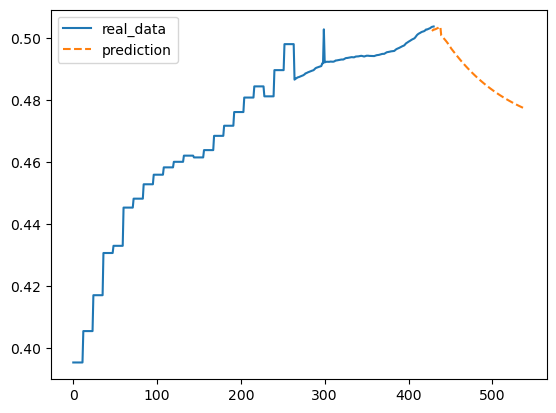

In [144]:
li = fake(y[-13:-1].reshape(1, 12, 1), [], 0)
a = []
for i in range(len(li)):
    a.append(li[i][0][0])
for i in range(11):
    a.append(li[99][0][i+1])
plt.plot(y, label='real_data')
plt.plot([i-3 for i in range(len(y), len(y)+len(a))], a, linestyle='dashed', label='prediction')
plt.legend()
plt.savefig('./documents/fig/faker_lstm.jpg')
plt.show()